# MLP Test 2

Explorando `GridSearchCV` para otimizar hiperparâmetros da **MLP**.

## Importando bibliotecas

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
# Carregando dados
X, y = load_iris(return_X_y=True)

# Separando dados para treino e teste
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Pré-processando dados
sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)

X_test = sc.transform(X_pre_test)

In [4]:
grid = {
    'hidden_layer_sizes':[(25), (50), (100), (125), (25, 25), (50, 50), (100, 100), (125, 125), (25, 25, 25), (50, 50, 50)],
    'activation':['logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'learning_rate_init':[0.001, 0.0001, 0.00001, 0.000001],
    'max_iter':[100, 150, 200, 250, 300]
}

resultData = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=grid,
    cv=7
).fit(
    X_train,
    y_train
)

resultDF = pd.DataFrame(resultData.cv_results_)
resultDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_max_iter,param_solver,...,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077670,0.048121,0.001146,0.000389,logistic,25,constant,0.001,100,lbfgs,...,0.933333,0.933333,0.933333,1.000000,0.866667,0.933333,0.800000,0.914286,0.058709,1893
1,0.080341,0.006877,0.000557,0.000080,logistic,25,constant,0.001,100,sgd,...,0.733333,0.733333,0.600000,0.666667,0.666667,0.666667,0.666667,0.676190,0.042592,2841
2,0.111081,0.021406,0.000920,0.000373,logistic,25,constant,0.001,100,adam,...,0.733333,0.800000,0.733333,0.733333,0.733333,0.666667,0.800000,0.742857,0.042592,2657
3,0.055999,0.021313,0.000898,0.000411,logistic,25,constant,0.001,150,lbfgs,...,1.000000,1.000000,0.933333,1.000000,0.933333,0.933333,0.800000,0.942857,0.065983,293
4,0.129330,0.018833,0.000721,0.000340,logistic,25,constant,0.001,150,sgd,...,0.733333,0.733333,0.733333,0.666667,0.666667,0.600000,0.666667,0.685714,0.046657,2827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.022332,0.001508,0.001552,0.000851,relu,"(50, 50, 50)",adaptive,1e-06,250,sgd,...,0.533333,0.466667,0.133333,0.333333,0.333333,0.333333,0.333333,0.352381,0.116642,3916
5396,0.025739,0.001289,0.001025,0.000578,relu,"(50, 50, 50)",adaptive,1e-06,250,adam,...,0.400000,0.266667,0.133333,0.333333,0.333333,0.333333,0.333333,0.304762,0.078535,4956
5397,0.128665,0.115367,0.001238,0.000722,relu,"(50, 50, 50)",adaptive,1e-06,300,lbfgs,...,0.933333,0.866667,0.933333,0.933333,1.000000,0.933333,0.800000,0.914286,0.058709,1599
5398,0.023949,0.001831,0.001083,0.000700,relu,"(50, 50, 50)",adaptive,1e-06,300,sgd,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.314286,0.046657,4834


In [9]:
resultDF[
    [
        'param_hidden_layer_sizes',
        'param_activation',
        'param_solver',
        'param_learning_rate',
        'param_learning_rate_init',
        'param_max_iter',
        'split0_test_score',
        'split1_test_score',
        'split2_test_score',
        'split3_test_score',
        'split4_test_score',
        'split5_test_score',
        'split6_test_score',
        'mean_test_score',
        'std_test_score',
        'rank_test_score'
    ]
].sort_values(by='rank_test_score').head(30)

,param_hidden_layer_sizes,param_activation,param_solver,param_learning_rate,param_learning_rate_init,param_max_iter,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
3248,"(25, 25, 25)",tanh,adam,constant,0.001,200,1.0,1.000000,0.933333,1.0,0.933333,1.000000,0.933333,0.971429,0.032991,1
3542,"(50, 50, 50)",tanh,adam,adaptive,0.001,100,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2
3251,"(25, 25, 25)",tanh,adam,constant,0.001,250,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2
2051,50,tanh,adam,invscaling,0.001,250,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2
261,50,logistic,lbfgs,invscaling,0.0001,200,1.0,1.000000,0.933333,1.0,0.933333,1.000000,0.866667,0.961905,0.048562,2
2651,"(25, 25)",tanh,adam,adaptive,0.001,250,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2
2654,"(25, 25)",tanh,adam,adaptive,0.001,300,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2
3305,"(25, 25, 25)",tanh,adam,invscaling,0.001,150,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2
189,50,logistic,lbfgs,constant,0.001,250,1.0,1.000000,0.933333,1.0,1.000000,0.933333,0.866667,0.961905,0.048562,2
3422,"(50, 50, 50)",tanh,adam,constant,0.001,100,1.0,1.000000,0.933333,1.0,0.933333,0.933333,0.933333,0.961905,0.032991,2


In [41]:
top500 = resultDF[
    [
        'param_hidden_layer_sizes',
        'param_activation',
        'param_solver',
        'param_learning_rate',
        'param_learning_rate_init',
        'param_max_iter',
        'rank_test_score'
    ]
].sort_values(by='rank_test_score').head(500)

top500.param_hidden_layer_sizes.value_counts()

(50, 50)        64
(25, 25)        55
50              54
(50, 50, 50)    54
(100, 100)      51
(125, 125)      49
(25, 25, 25)    47
125             45
100             45
25              36
Name: param_hidden_layer_sizes, dtype: int64

logistic    254
tanh        126
relu        120
Name: param_activation, dtype: int64

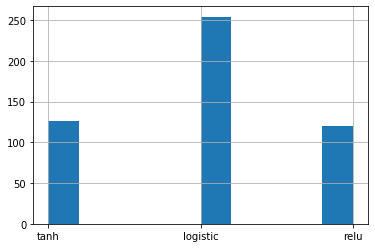

In [42]:
top500.param_activation.hist()
top500.param_activation.value_counts()

lbfgs    311
adam     189
Name: param_solver, dtype: int64

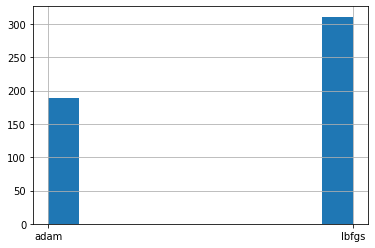

In [43]:
top500.param_solver.hist()
top500.param_solver.value_counts()

constant      183
adaptive      159
invscaling    158
Name: param_learning_rate, dtype: int64

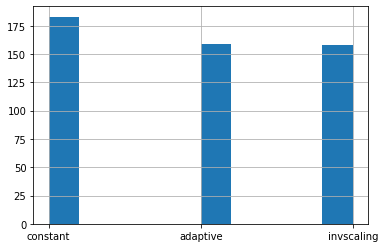

In [44]:
top500.param_learning_rate.hist()
top500.param_learning_rate.value_counts()

0.001000    265
0.000001     83
0.000100     81
0.000010     71
Name: param_learning_rate_init, dtype: int64

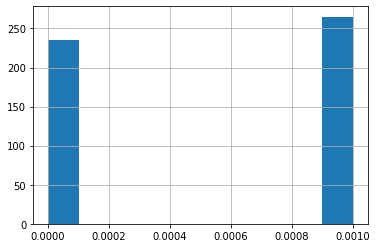

In [45]:
top500.param_learning_rate_init.hist()
top500.param_learning_rate_init.value_counts()

300    112
250    108
200    108
150     91
100     81
Name: param_max_iter, dtype: int64

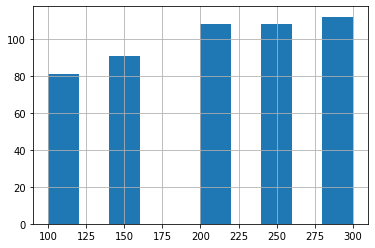

In [47]:
top500.param_max_iter.hist()
top500.param_max_iter.value_counts()